# Spring Boot JSP

## MVC 작성

`src/main/java`에 `com.bohyung.mvc.controller` -`HelloController` 클래스 생성 후 `@Controller` 어노테이션
```java
@Controller	
public class HelloController {
	@GetMapping("/hello")
	public String hello(Model model) {
		model.addAttribute("msg", "Hello Boot");
		return "hello";
	}
}
```
- 컴포넌트 스캔을 하지 않아도 등록되도록 스프링 부트가 설정되어있다.

`src/main/resources/application.properties`에 설정 등록

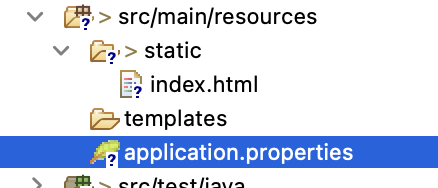

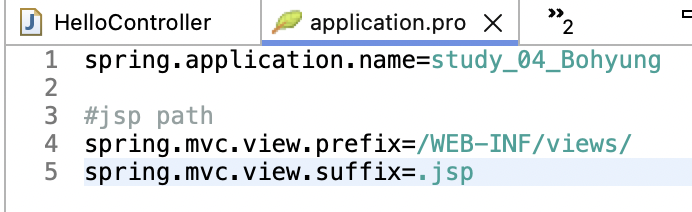


폴더 생성  

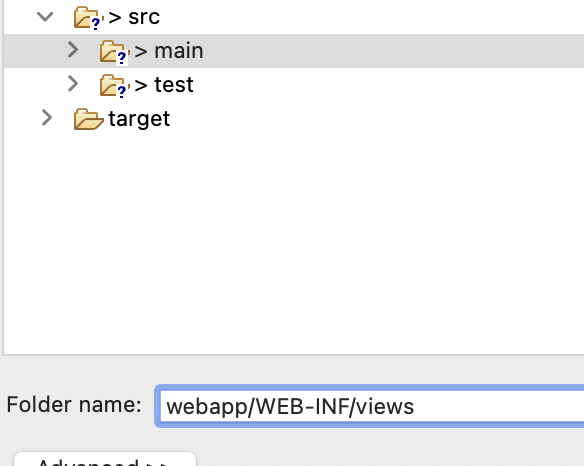

- 여기에 `hello.jsp` 생성


[MvnRepository](https://mvnrepository.com/artifact/org.apache.tomcat.embed/tomcat-embed-jasper/11.0.2)에서 `Tomcat Embed Jasper` 의존성을 `pom.xml`에 추가
- `<version>`은 스프링부트가 이미 관련된 버전을 가지고 있기 때문에 충돌이 될 수 있으므로 태그 및 내용 삭제

[MvnRepository](https://mvnrepository.com/artifact/jakarta.servlet.jsp.jstl/jakarta.servlet.jsp.jstl-api)에서 `jstl`(jakarta.servlet.jsp.jstl) 추가
- 마찬가지로 `version` 삭제

[MvnRepository](https://mvnrepository.com/artifact/org.glassfish.web/jakarta.servlet.jsp.jstl)에서 `Glassfish jstl` 추가
- `version` 삭제

### 최종
```xml
<dependency>
    <groupId>org.apache.tomcat.embed</groupId>
    <artifactId>tomcat-embed-jasper</artifactId>
</dependency>
<dependency>
    <groupId>jakarta.servlet.jsp.jstl</groupId>
    <artifactId>jakarta.servlet.jsp.jstl-api</artifactId>
</dependency>
<dependency>
    <groupId>org.glassfish.web</groupId>
    <artifactId>jakarta.servlet.jsp.jstl</artifactId>
</dependency>
```

이때 서버가 켜져있으면 안되니 재부팅하자.

## 실습

> 간단한 로그인 기능을 만들어보자.  

- `a` 태그로 이동하기
    ```html
    <a href="/hello">hello로 이동</a>
    ```

`hello.jsp`
```xml
<%@ page language="java" contentType="text/html; charset=UTF-8"
    pageEncoding="UTF-8"%>
<%@ taglib prefix="c" uri="jakarta.tags.core" %>

<!DOCTYPE html>
<html>
<head>
<meta charset="UTF-8">
<title>Insert title here</title>
</head>
<body>
	<!-- 로그인 X -> 로그인 page -->
	<c:if test="${empty loginUser}">
		<a href="login">로그인</a>
	</c:if>
	<!-- 로그인 O -> logout -->
	<h2>hello</h2>
	<c:if test="${not empty loginUser }">
		<span>${loginUser }님 반갑습니다!</span>
		<a href="/logout">로그아웃</a>
	</c:if>
	${msg }
</body>
</html>
```

### JSTL

> JSP Standard Tag Library  
> `JSTL` 확장 태그를 사용하는 용도
```xml
<%@ taglib prefix="접두사" uri="URI" %>
```
- `c:if`사용하기 위함

`User` 모델 만들기

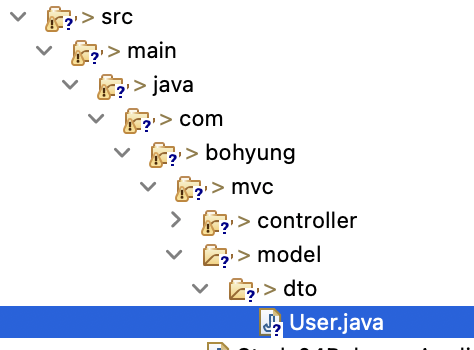
- `getter`, `setter`만들고 생성자도 만들어준다.

`UserController`
```java
@Controller
public class UserController {
	
	@GetMapping("/login")
	public String loginForm() {
		return "/user/loginForm";
	}
	@PostMapping("/login")
	public String login(@ModelAttribute User user, HttpSession session) {
		// 지금은 sevice를 구현하지 않아서 id를 냅다 넣음
		session.setAttribute("loginUser", user.getId());
		System.out.println(user);
		return "redirect:hello";
		
	}
	
	@GetMapping("/logout")
	public String logout(HttpSession session) {
		//1. session에서 유저 속성 지우기
		session.removeAttribute("loginUser");
		//2. session 초기화
		session.invalidate();
		
		return "redirect:/";
	}
}
```
- 로그인하면 세션에 속성 정보를 추가하고, 로그아웃하면 삭제한다.
- `redirect:`
